In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
#reading csv file

In [4]:
data=pd.read_csv(r"C:\Users\chand\OneDrive\edap\archive (1)\tvshows.csv")

## pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [6]:
new_order = [1,2,3,4,5,6,7,8,9,10]
data=data[data.columns[new_order]]

In [7]:
data.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0


## for sample data

In [8]:
data.sample()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
4903,5222,Grandma's Cats (Are Trying To Kill Her!),2015,NaN,NaN,10/100,0,0,1,0


## for n number of samples

In [9]:
data.sample(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
2640,2741,Fast N' Loud,2012,16+,7.5/10,55/100,0,1,0,0
752,755,The World's Most Amazing Vacation Rentals,2021,NaN,6.6/10,57/100,1,0,0,0
3959,4236,Porterhouse Blue,1987,18+,7.6/10,45/100,0,0,1,0
5037,5356,Wedding Season,2017,NaN,NaN,10/100,0,0,1,0
4788,5107,Pinkfong! Bedtime Lullabies,2015,NaN,NaN,10/100,0,0,1,0


##  shape of the dataset

In [10]:
data.shape

(5368, 10)

## to find non null values and data types

In [11]:
data.info

<bound method DataFrame.info of         ID                                  Title  Year  Age    IMDb  \
0        1                           Breaking Bad  2008  18+  9.4/10   
1        2                        Stranger Things  2016  16+  8.7/10   
2        3                        Attack on Titan  2013  18+  9.0/10   
3        4                       Better Call Saul  2015  18+  8.8/10   
4        5                                   Dark  2017  16+  8.8/10   
...    ...                                    ...   ...  ...     ...   
5363  5713                       Paradise Islands  2017  NaN     NaN   
5364  5714                         Mexico Untamed  2018  NaN     NaN   
5365  5715                  Wild Centeral America  2020  NaN     NaN   
5366  5716                            Wild Russia  2018  NaN     NaN   
5367  5717  Fearless Adventures with Jack Randall  2018  NaN     NaN   

     Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  
0            100/100        1     0        

## from here onwards we shall start working on the data 

In [12]:
# for count of all sum  of null values

In [13]:
data.isnull().sum()

ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
dtype: int64

In [14]:
# THE NULL VALUES:
    # Age
     #IMDb

# DATA CLEANING

In [15]:
# let us check the value_counts() and describe() 

In [16]:
data['Netflix'].value_counts()

0    3397
1    1971
Name: Netflix, dtype: int64

In [17]:
data['Netflix'].describe()

count    5368.000000
mean        0.367176
std         0.482080
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Netflix, dtype: float64

### cleaning null  values from column Netflix

In [18]:
data["Netflix"].isnull().sum()

0

In [19]:
#avg values

In [20]:
data['Netflix'] = data['Netflix'].fillna(data.groupby('Title')['Netflix'].transform('mean'))

In [21]:
data['Netflix'].isnull().sum()

0

In [22]:
# removing the remaining null values

In [23]:
data.dropna(subset=['Netflix'], inplace=True)

In [24]:
data['Netflix'].isnull().sum()

0

## cleaning null values

In [25]:
data.isnull().sum()

ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
dtype: int64

In [26]:
# here let us make IMDb values as 0

In [27]:
data["IMDb"].value_counts()

7.4/10    208
7.3/10    191
7.6/10    191
7.5/10    183
7.8/10    180
         ... 
1.9/10      1
1.5/10      1
2.7/10      1
1.1/10      1
9.5/10      1
Name: IMDb, Length: 78, dtype: int64

In [28]:
data['IMDb']= data['IMDb'].fillna(0)

In [29]:
data["IMDb"].isnull().sum()

0

In [30]:
data.isnull().sum()

ID                    0
Title                 0
Year                  0
Age                2127
IMDb                  0
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
dtype: int64

In [31]:
# see here we can see earlier IMDb had some value as 962 and now we made it as 0 

In [32]:
# now let us remove the remaining null value

In [33]:
data["Age"].value_counts()

16+    995
18+    854
7+     831
all    552
13+      9
Name: Age, dtype: int64

In [34]:
data['Age']= data['Age'].fillna(0)

In [35]:
data["Age"].isnull().sum()

0

In [36]:
data.isnull().sum()

ID                 0
Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
dtype: int64

### here we can observe that Age was having a number or integer earlier but now we can see it has 0 value. hence we conclude that we made everything as 0

# UNIVARIATE ANALYSIS

In [37]:
data.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0


#### for better understanding let us visualize the data

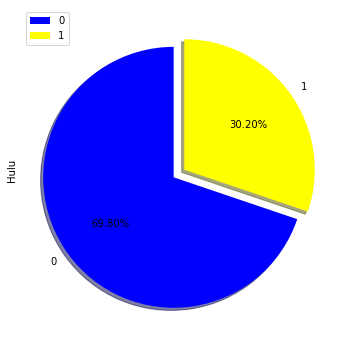

In [38]:
ax=plt.figure(figsize=[8,6])
explode = (0.1, 0)
data["Hulu"].value_counts().plot.pie(explode=explode,autopct = "%.2f%%", 
shadow=True,colors = ['blue', 'yellow'],startangle=90)
plt.legend()

#### Here let us visualize the tv shows with age 

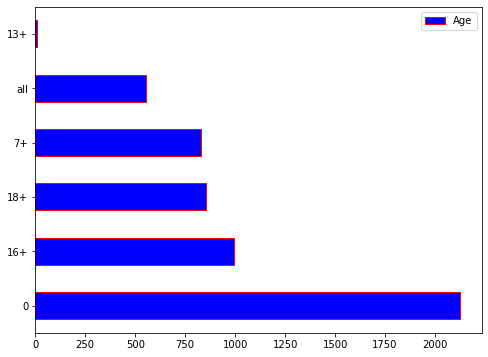

In [39]:
ax=plt.figure(figsize=[8,6])
data["Age"].value_counts().plot.barh(color='blue',edgecolor='red')
plt.legend()

In [40]:
# now let us check with Rotten Tomatoes

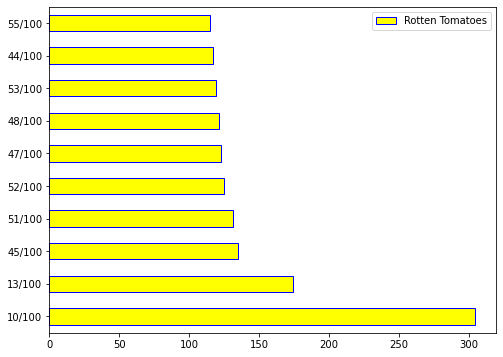

In [41]:
ax=plt.figure(figsize=[8,6])
data["Rotten Tomatoes"].value_counts().head(10).plot.barh(50,200,color='yellow',edgecolor='blue')
plt.legend()

In [42]:
#Bivariate Analysis

In [43]:
data.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0


In [44]:
#now let us visualize the graph between year and netflix

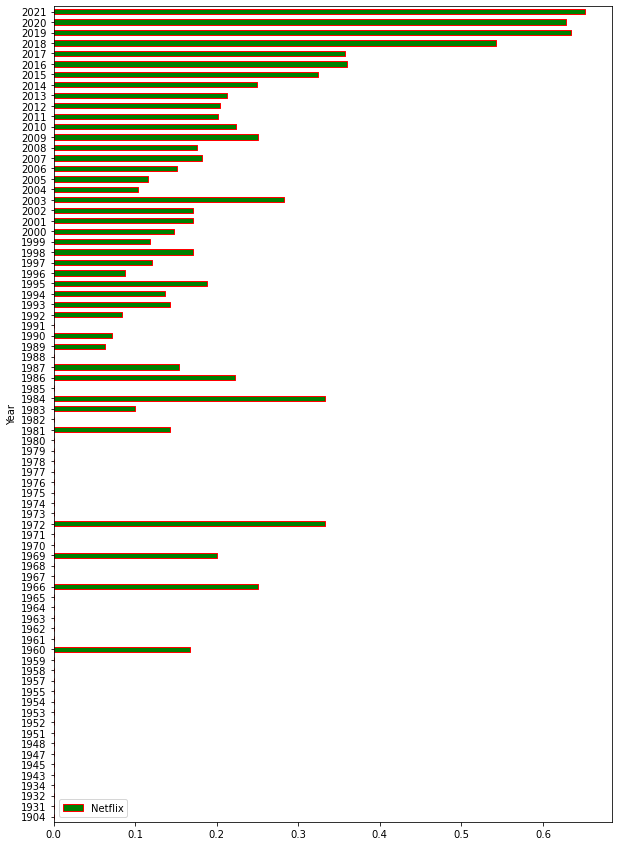

In [48]:
ax=plt.figure(figsize=[10,15])
data.groupby('Year').mean()['Netflix'].plot.barh(color='green',edgecolor='red')
plt.legend()

In [46]:
# now let's see the graph between year and hulu

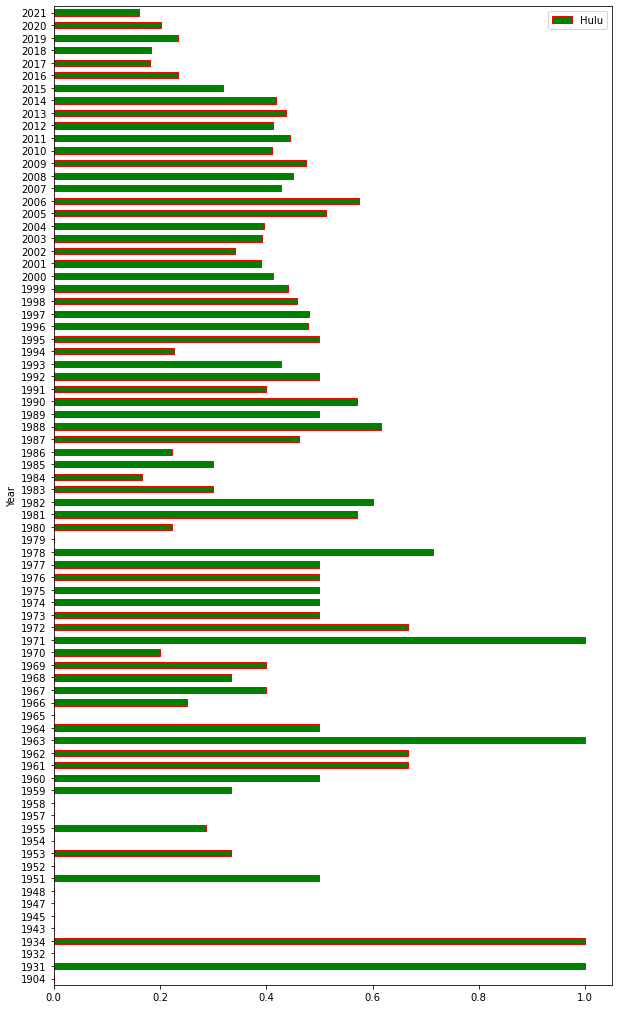

In [49]:
ax=plt.figure(figsize=[10,18])
data.groupby('Year').mean()['Hulu'].plot.barh(color='green',edgecolor='red')
plt.legend()

In [90]:
# now let's visualize a graph between age and netflix

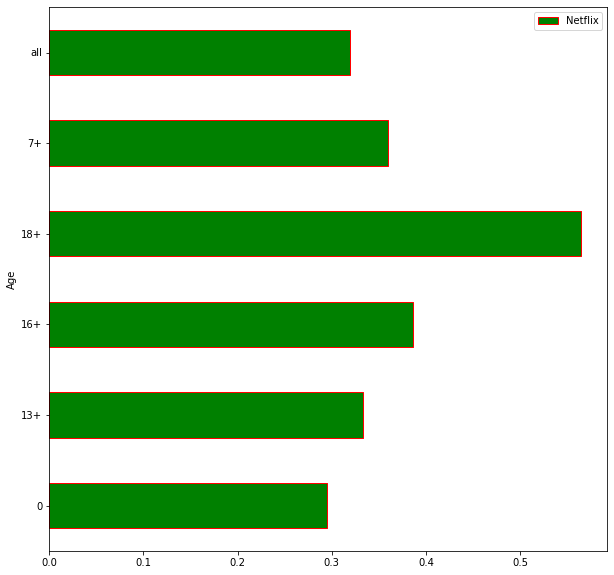

In [91]:
ax=plt.figure(figsize=[10,10])
data.groupby('Age').mean()['Netflix'].plot.barh(color='green',edgecolor='red')
plt.legend()

In [92]:
# now let's visualize a graph between age and Prime video

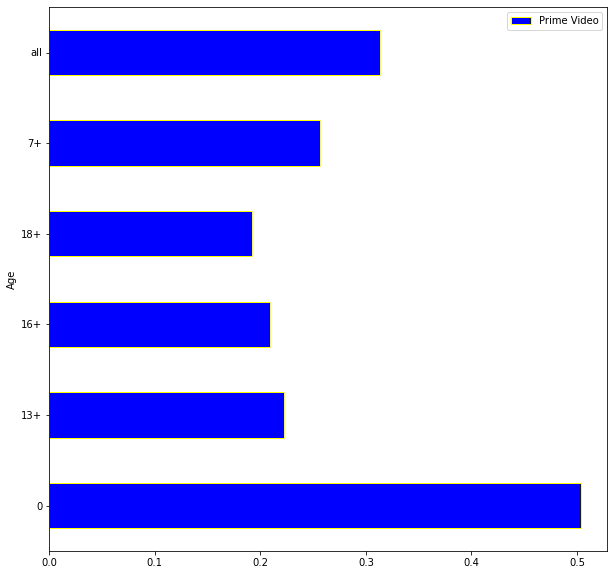

In [93]:
ax=plt.figure(figsize=[10,10])
data.groupby('Age').mean()['Prime Video'].plot.barh(color='blue',edgecolor='yellow')
plt.legend()

In [94]:
# correlation matrix

In [95]:
data.corr()

,ID,Year,Netflix,Hulu,Prime Video,Disney+
ID,1.000000,-0.180923,-0.822841,-0.069482,0.599021,0.376502
Year,-0.180923,1.000000,0.274506,-0.138395,-0.202569,-0.010082
Netflix,-0.822841,0.274506,1.000000,-0.393263,-0.461642,-0.184281
Hulu,-0.069482,-0.138395,-0.393263,1.000000,-0.336292,-0.116525
Prime Video,0.599021,-0.202569,-0.461642,-0.336292,1.000000,-0.185540
Disney+,0.376502,-0.010082,-0.184281,-0.116525,-0.185540,1.000000


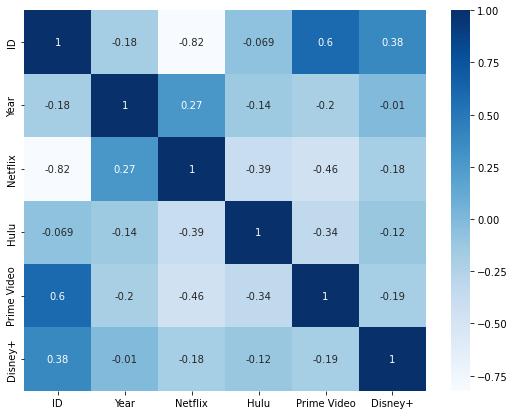

In [96]:
# displaying the plotted heatmap
ax=plt.figure(figsize=[9,7])
sns.heatmap(data = data.corr(),cmap="Blues",annot=True)
plt.show()

In [97]:
# conclusion
#the heatmap shows the correlation matrix

In [98]:
df=data[~data.Year.isnull()]

In [99]:
df[["Netflix"]].nunique()

Netflix    2
dtype: int64

In [100]:
#Multivariate  Analysis

In [101]:
#Multivariate analysis is to study the relation among multiple variables.

In [102]:
#Pair plot:Seaborn Pairplot uses to get the relation between each and every variable present in Pandas DataFrame.

<Figure size 864x720 with 0 Axes>

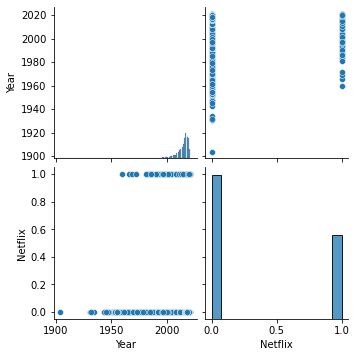

In [103]:
plt.figure(figsize=(12,10))
sns.pairplot(data=data[["Year","IMDb","Netflix"]])

In [104]:
#Conclusion

In [105]:
# Here we conclude that the function creates a grid of axes such that each variable in the data will be by shared in the y-axis across a single row and in the x-axis across a single column.

In [106]:
#The above graph is drawn for year, IMDb rating and Netflix dataset that we can evaluate the dataset.

In [107]:
#Heat maps

In [108]:
#Heat map is a two-dimensional representation of data in which the variable values are evaluated in colors mainly heat maps are used to find the correlation among the columns

In [109]:
#This heat map works by correlation.However, we cannot correlate strings. we can only correlate numerical features.

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

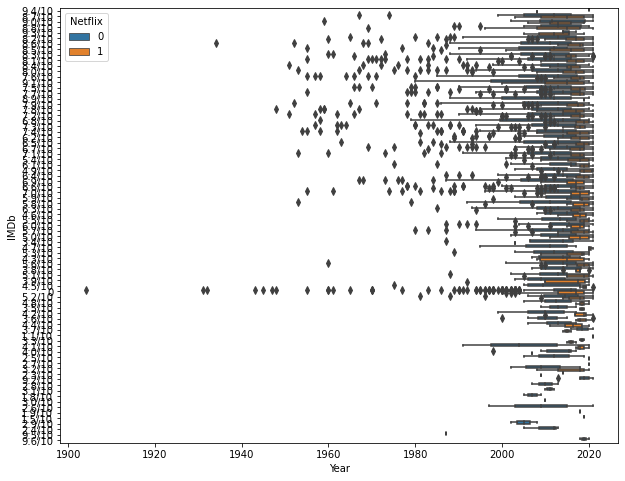

In [110]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x="Year" ,y="IMDb",hue="Netflix")

In [111]:
a=pd.pivot_table(data=df,index="Year",columns="Age",values="Hulu")
a

Age,0,13+,16+,18+,7+,all
Year,,,,,,
1904,0.000000,NaN,NaN,NaN,NaN,NaN
1931,1.000000,NaN,NaN,NaN,NaN,NaN
1932,NaN,NaN,NaN,NaN,NaN,0.000000
1934,NaN,NaN,NaN,NaN,NaN,1.000000
1943,NaN,NaN,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...
2017,0.141210,NaN,0.337662,0.252874,0.180328,0.060606
2018,0.177273,NaN,0.312500,0.137097,0.162162,0.104167
2019,0.238095,NaN,0.315217,0.189781,0.283582,0.083333


<AxesSubplot:xlabel='Age', ylabel='Year'>

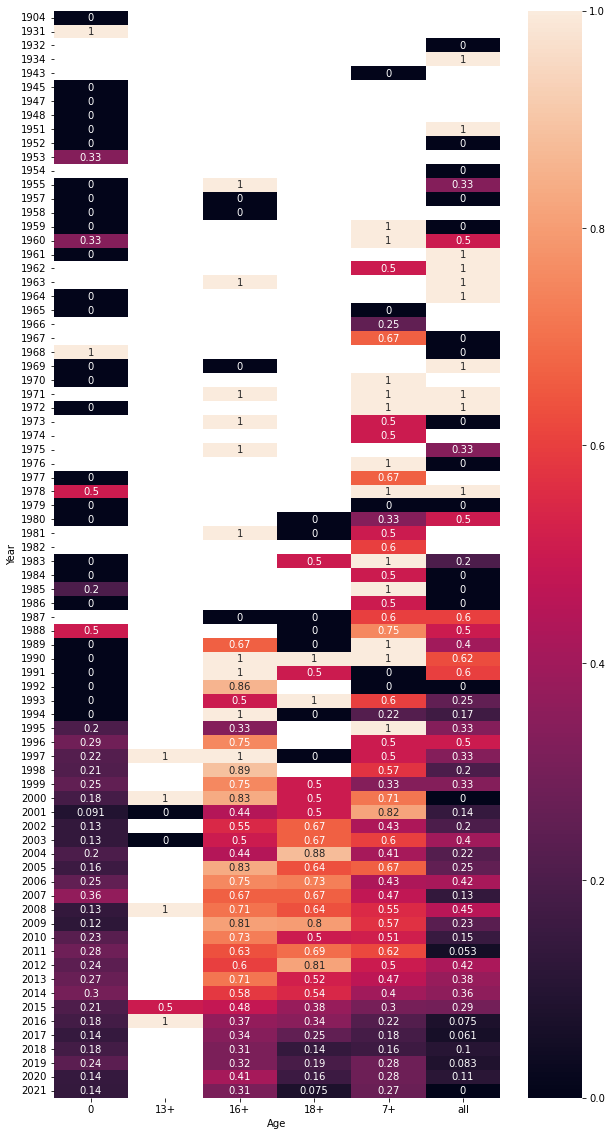

In [126]:
plt.figure(figsize=(10,20))
sns.heatmap(a,annot=True)

In [114]:
b=pd.pivot_table(data,index="Year",columns="Age",values="Netflix")
b

Age,0,13+,16+,18+,7+,all
Year,,,,,,
1904,0.000000,NaN,NaN,NaN,NaN,NaN
1931,0.000000,NaN,NaN,NaN,NaN,NaN
1932,NaN,NaN,NaN,NaN,NaN,0.000000
1934,NaN,NaN,NaN,NaN,NaN,0.000000
1943,NaN,NaN,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...
2017,0.219020,NaN,0.519481,0.563218,0.606557,0.424242
2018,0.318182,NaN,0.635417,0.733871,0.702703,0.645833
2019,0.613095,NaN,0.554348,0.737226,0.582090,0.638889


<AxesSubplot:xlabel='Age', ylabel='Year'>

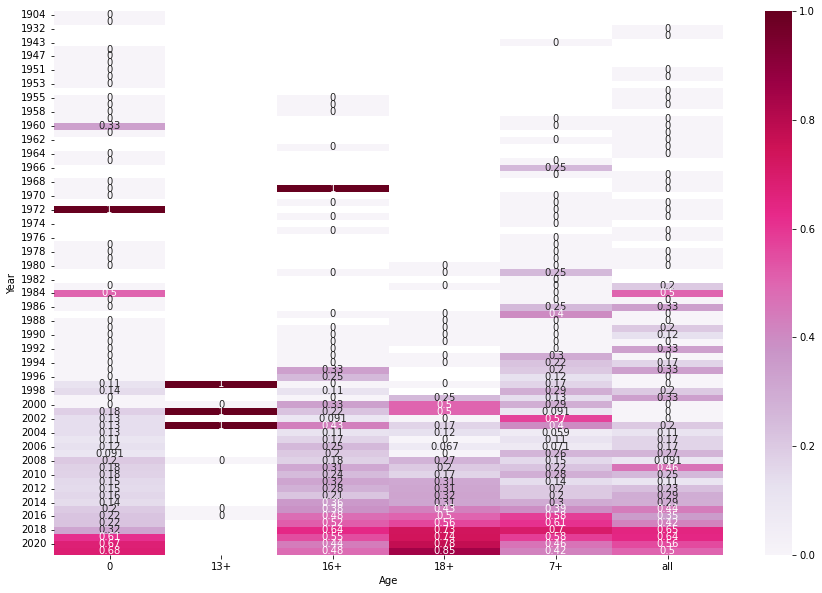

In [115]:
plt.figure(figsize=(15,10))
sns.heatmap(b,annot=True,cmap="PuRd")

<AxesSubplot:xlabel='Age', ylabel='Year'>

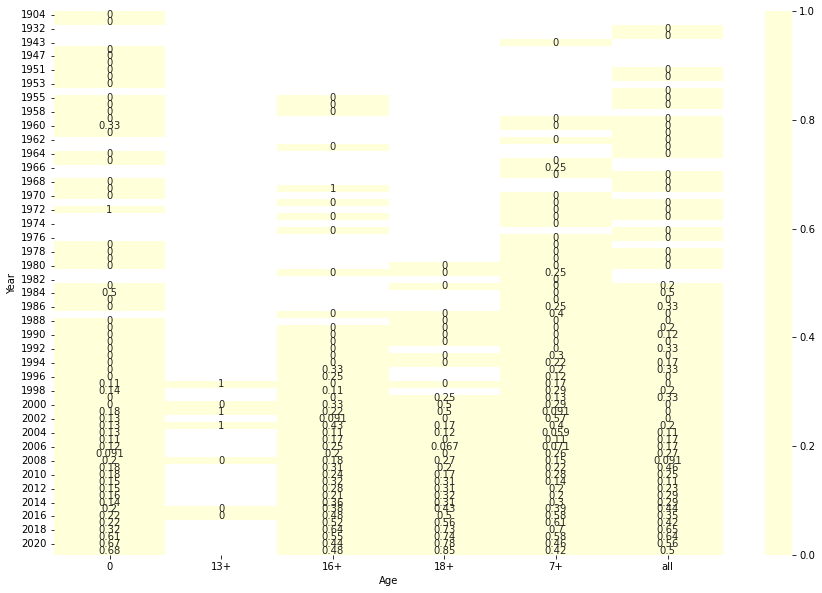

In [116]:
plt.figure(figsize=(15,10))
sns.heatmap(b,annot=True,cmap="YlGnBu",center=7000)


<AxesSubplot:xlabel='Age', ylabel='Year'>

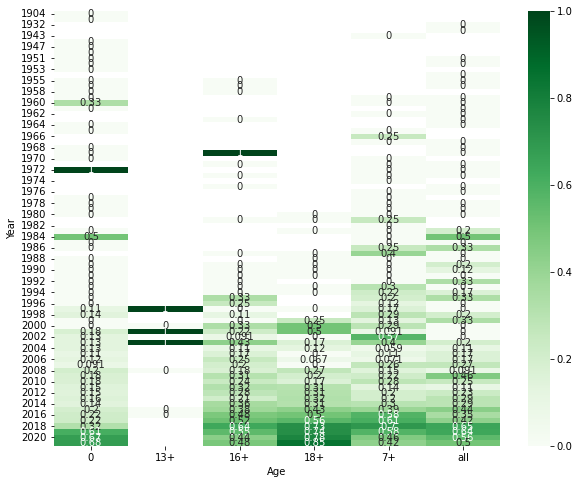

In [117]:
plt.figure(figsize=(10,8))
sns.heatmap(b,annot=True,cmap="Greens")

In [124]:
c=pd.pivot_table(data,index="Age",columns="Netflix",values="Hulu")
c

Netflix,0,1
Age,,
0,0.261333,0.019139
13+,0.833333,0.333333
16+,0.738134,0.130208
18+,0.637097,0.049793
7+,0.548872,0.110368
all,0.308511,0.045455


<AxesSubplot:xlabel='Netflix', ylabel='Age'>

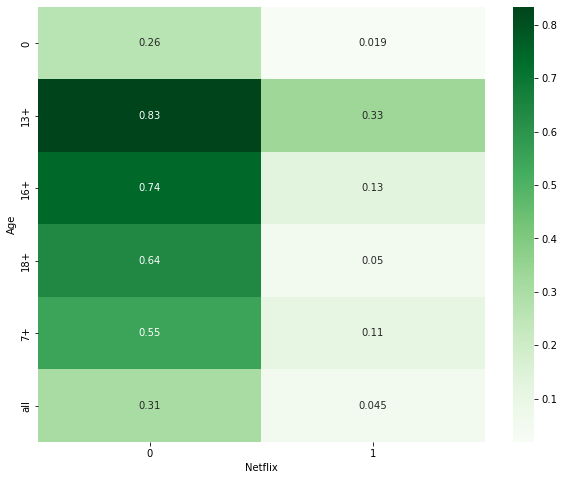

In [125]:
plt.figure(figsize=(10,8))
sns.heatmap(c,annot=True,cmap="Greens")